# Анализ тарифов компании «Мегалайн» 
    
Мы — аналитики компании «Мегалайн» — федерального оператора сотовой связи. Клиентам наша компания предлагает два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
    
    
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. 


____



В данном исследовании представлен процесс предобработки информации с последующим использованием очищенных данных для выполнения поставленных коммерческим департаментом задач. Процесс предобработки информации представлен в виде пошаговых действий по постепенному повышению пригодности данных к использованию. Также произведен анализ данных в соответствии с инструкциями заказчика. Каждый значительный шаг сопровождается промежуточным, либо общим выводом.
    
____
    

    
Часть 1. Изучение общей информации о предоставленных датасетах
    
1. Импорт необходимых библиотек для работы с данными, загрузка датасетов
2. Изучение данных, получение общей информации
3. Вывод

Часть 2. Предобработка данных
    
1. Замена типа данных
2. Обработка пропусков
3. Обработка дубликатов
4. Вывод
    
Часть 3. Добавление необходимой информации
    
1. Создание датафрейма с количеством сделанных звонков и израсходованных минут разговора
2. Создание датафрейма с количеством отправленных сообщений
3. Создание датафрейма с объемом израсходованного трафика
4. Добавление информации о помесячной выручке с каждого пользователя
5. Вывод
    
Часть 4. Анализ полученной информации
    
1. Вычисление среднего, дисперсии, стандартного отклонения
2. Визуальный анализ полученной информации
3. Вывод

Часть 5. Проверка гипотез

1. Гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"
2. Гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"
3. Вывод
    
Часть 6. Общий вывод
1. Общий вывод о проделанной работе

 ## Часть 1. Изучение общей информации о предоставленных датасетах

<a id='Импорт необходимых библиотек для работы с данными, загрузка датасета'>

### <p style="text-align:center"> Импорт необходимых библиотек для работы с данными, загрузка датасетов</p>

Импортируем необходимые библиотеки, убираем ограничения на количество столбцов, отключаем предупреждения.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
import warnings
warnings.simplefilter('ignore')

Загружаем датасеты, проверяем вывод.

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv')

In [3]:
data_internet = pd.read_csv('/datasets/internet.csv')

In [4]:
data_messages = pd.read_csv('/datasets/messages.csv')

In [5]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [6]:
data_users = pd.read_csv('/datasets/users.csv')

In [7]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [8]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [9]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<a id='Изучение данных, получение общей информации'></a>

### <p style="text-align:center"> Изучение данных, получение общей информации</p>

Ознакомимся с информацией, посмотрим соответствуют ли типы ячеек назначению. В качестве дополнительной проверки возьмем случайные 20 строк из каждого датасета, посмотрим на странные, выбивающиеся, отсутствующие значения.

In [12]:
data_calls.sample(n=20, random_state=1)

,id,call_date,duration,user_id
26953,1066_374,2018-08-26,0.00,1066
66122,1168_1273,2018-03-28,16.05,1168
67325,1171_350,2018-09-14,6.23,1171
74643,1186_465,2018-09-02,0.79,1186
192311,1472_124,2018-05-04,5.94,1472
47375,1118_664,2018-10-24,13.41,1118
91143,1227_563,2018-08-03,15.15,1227
3818,1010_67,2018-08-16,14.29,1010
182822,1454_574,2018-09-23,9.98,1454
187346,1463_0,2018-12-05,10.63,1463


In [13]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [14]:
data_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [15]:
data_internet.sample(n=20, random_state=1)

,Unnamed: 0,id,mb_used,session_date,user_id
35745,35745,1124_125,122.45,2018-12-03,1124
18383,18383,1064_102,320.60,2018-12-19,1064
59774,59774,1203_22,605.96,2018-06-17,1203
56317,56317,1188_123,781.73,2018-05-08,1188
52231,52231,1176_386,150.98,2018-08-20,1176
20276,20276,1068_26,389.65,2018-12-04,1068
82748,82748,1281_64,841.89,2018-11-07,1281
129266,129266,1431_300,461.23,2018-11-26,1431
46783,46783,1160_75,0.00,2018-08-15,1160
48492,48492,1168_260,336.06,2018-07-28,1168


In [16]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [17]:
data_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [18]:
data_messages.sample(n=20, random_state=1)

,id,message_date,user_id
45696,1197_26,2018-12-31,1197
66091,1282_523,2018-11-30,1282
18743,1082_184,2018-10-18,1082
33759,1146_557,2018-12-22,1146
11403,1048_49,2018-09-27,1048
97793,1401_125,2018-08-10,1401
406,1000_406,2018-12-29,1000
71393,1302_221,2018-10-23,1302
103004,1420_11,2018-12-12,1420
53795,1238_208,2018-10-08,1238


In [19]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [20]:
data_messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [21]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [22]:
data_tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [23]:
data_users.sample(n=20, random_state=1)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
304,1304,68,NaN,Владимир,Илья,Соловьёв,2018-11-05,ultra
340,1340,50,NaN,Пенза,Тимофей,Алютин,2018-01-30,smart
47,1047,67,NaN,Саратов,Милица,Меркулова,2018-10-29,smart
67,1067,45,NaN,Москва,Юзефа,Абашкина,2018-04-09,smart
479,1479,40,NaN,Хабаровск,Игорь,Богданов,2018-07-03,smart
485,1485,34,NaN,Киров,Таисия,Сухова,2018-12-29,ultra
310,1310,28,NaN,Уфа,Рудольф,Нестеров,2018-03-22,ultra
31,1031,66,NaN,Москва,Лаврентий,Тимофеев,2018-11-02,smart
249,1249,25,NaN,Курск,Изольда,Авдушева,2018-08-14,smart
90,1090,54,2018-12-03,Череповец,Екатерина,Астафьева,2018-10-11,ultra


In [24]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [25]:
data_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<a id='Вывод_1'></a>

### <p style="text-align:center"> Вывод</p>

##### В ходе первичного анализа данных были выявлены следующие недостатки и сделаны следующие выводы:

___


1. В датасете data_internet обнаружен столбец Unnamed: 0 дублирующий индексы, от него можно избавиться.


2. Столбец duration таблицы data_calls имеет нулевые значения, которые, исходя из задания, нам не потребуются. Возможно, следует исключить их из выборки.


3. Столбец churn_date таблицы data_users имеет пропущенные значения, возможно следует их заполнить.


4. Столбцы датафреймов содержащие даты принадлежат к типу данных object, а должны к datetime, исправим это.


5. Часть данных имеют типы int64 и float64, возможно следует поменять эти типы данных на менее ресурсоемкие, в целях уменьшения использования памяти устройства.


6. Часть данных имеет тип object, обычно потребляющий сравнительно много памяти, возможно следует произвести внутреннюю  категоризацию этих данных, также в целях уменьшения использования памяти устройства.
___

Таким образом было выполнено первичное ознакомление с предоставленной информацией, выявлены дефекты датасета. Данные нуждаются в предобработке.

## Часть 2. Предобработка данных

<a id='Замена типа данных'></a>

### <p style="text-align:center">Замена типа данных</p>

Заменим в разных датафреймах, в столбцах, связанных с датой, тип данных object на datetime.

In [26]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')

Проведем оптимизацию хранения данных объектных типов с использованием категориальных переменных.

In [27]:
data_users['city'] = data_users['city'].astype('category')
data_users['tariff'] = data_users['tariff'].astype('category')

Поменяем тип данных с int64 на uint8 или uint16.

In [28]:
data_calls['user_id'] = data_calls['user_id'].astype('uint16')
data_internet['user_id'] = data_internet['user_id'].astype('uint16')
data_messages['user_id'] = data_messages['user_id'].astype('uint16')
data_users['user_id'] = data_users['user_id'].astype('uint16')
data_users['age'] = data_users['age'].astype('uint8')

Округляем в соответствии с заданием. Меняем тип данных с float64 на uint16.

In [29]:
data_calls['duration'] = data_calls['duration'].apply(np.ceil).astype('uint16')
data_internet['mb_used'] = data_internet['mb_used'].apply(np.ceil).astype('uint16')

<a id='Обработка пропусков'></a>

### <p style="text-align:center">Обработка пропусков</p>

Заменим пропуски в столбце churn_date датасета data_users на прочерки, просто для красоты.

In [30]:
data_users['churn_date'] = data_users['churn_date'].mask(data_users['churn_date'].isna(), '-')

Проанализируем аномалии в предоставленных датасетах. 

___ 



В показаных ниже срезах значения duration и mb_used равны нулю. В первом случае это может быть связано со звонками, которые остались без ответа, и поэтому имеют нулевую продолжительность. Во втором случае это, возможно, это отметка привязки устройства к другой сотовой вышке - если человек много куда-то ездит у него таких отметок больше, если сидит дома - меньше. В любом случае для выполнения поставленных задач у нас нет необходимости в подсчете количества звоноков (в том числе и не отвеченных) и подключений к интернету; нам важен только объем потраченных минут и мегабайт, поэтому выявленные аномалии можно смело игнорировать.

In [31]:
data_calls.query('duration == 0.0')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
9,1000_9,2018-08-15,0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0,1499
202592,1499_205,2018-10-13,0,1499
202593,1499_206,2018-12-26,0,1499
202594,1499_207,2018-10-28,0,1499


In [32]:
data_internet.query('mb_used == 0.0 and user_id == 1000')

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0,2018-08-28,1000
38,38,1000_38,0,2018-11-27,1000
46,46,1000_46,0,2018-06-30,1000
67,67,1000_67,0,2018-06-16,1000
72,72,1000_72,0,2018-06-15,1000
103,103,1000_103,0,2018-05-26,1000
111,111,1000_111,0,2018-09-01,1000
131,131,1000_131,0,2018-06-15,1000
143,143,1000_143,0,2018-12-29,1000
157,157,1000_157,0,2018-07-11,1000


In [33]:
data_internet.query('mb_used == 0.0 and user_id == 1003')

,Unnamed: 0,id,mb_used,session_date,user_id
683,683,1003_7,0,2018-11-04,1003
704,704,1003_28,0,2018-08-25,1003


Исходя из задания, нулевые значения в столбце duration таблицы data_calls нам не понадобятся.

In [34]:
data_calls = data_calls.query('duration != 0.0')

<a id='Обработка дубликатов'></a>

### <p style="text-align:center">Обработка дубликатов</p>

Удалим из датасета data_internet дублирующий столбец.

In [35]:
data_internet = data_internet.drop('Unnamed: 0', axis = 1)

Проверим датасеты на наличие дубликатов.

In [36]:
data_internet.duplicated().sum()

0

In [37]:
data_calls.duplicated().sum()

0

In [38]:
data_messages.duplicated().sum()

0

In [39]:
data_users.duplicated().sum()

0

<a id='Уменьшение памяти'>

Посмотрим, что у нас получилось после проведения работ по предобработке данных.

In [40]:
data_calls.head()

,id,call_date,duration,user_id
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000


29% экономии памяти.

In [41]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null uint16
user_id      162994 non-null uint16
dtypes: datetime64[ns](1), object(1), uint16(2)
memory usage: 4.4+ MB


In [42]:
data_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


51% экономии памяти.

In [43]:
data_internet.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null uint16
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null uint16
dtypes: datetime64[ns](1), object(1), uint16(2)
memory usage: 2.8+ MB


In [44]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


25% экономии памяти.

In [45]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null uint16
dtypes: datetime64[ns](1), object(1), uint16(1)
memory usage: 2.1+ MB


In [46]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,-,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,-,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,-,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,-,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,-,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


32% экономии памяти.

In [47]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null uint16
age           500 non-null uint8
churn_date    500 non-null object
city          500 non-null category
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null category
dtypes: category(2), datetime64[ns](1), object(3), uint16(1), uint8(1)
memory usage: 21.4+ KB


<a id='Вывод_2'>

### <p style="text-align:center">Вывод</p>

##### Таким образом в данной части нашего исследовании мы:

___


1. <a href='#Обработка пропусков'>Заполнили</a> пропуски в столбце churn_date датасета data_users.


2. <a href='#Обработка пропусков'>Удалили</a> нулевые значения в столбце duration таблицы data_calls.


3. <a href='#Замена типа данных'>Заменили</a> типы данных с object на datetime, c int64 и float64 на uint8 или uint16.


4. <a href='#Замена типа данных'>Провели</a> оптимизацию хранения данных объектных типов с использованием категориальных переменных.


5. <a href='#Обработка дубликатов'>Удалили</a> дублирующие столбцы и проверили датасеты на наличие дубликатов.


6. <a href='#Уменьшение памяти'>Добились</a> существенного уменьшения использования памяти устройства, около 30-50% по каждому датасету.

___

Таким образом, была выполнена предобработка данных, данные очищены, проверены и подготовлены. Переходим к следующей части нашего исследования.

## Часть 3. Добавление необходимой информации
    

<a id='Создание датафрейма с количеством сделанных звонков и израсходованных минут разговора'>

### <p style="text-align:center">Создание датафрейма с количеством сделанных звонков и израсходованных минут разговора</p>

In [48]:
data_calls.head()

,id,call_date,duration,user_id
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000


In [49]:
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month

In [50]:
users_calls = data_calls.pivot_table(index = ['month', 'user_id'], values = 'duration', aggfunc = 'sum')

In [51]:
users_calls.head()

duration
month user_id          
1     1005           95
      1032          380
      1045            9
      1055          551
      1071          194

In [52]:
users_calls['count_calls'] = data_calls.groupby('month')['user_id'].value_counts()

Проверяем.

In [53]:
users_calls.head()

duration  count_calls
month user_id                       
1     1005           95           11
      1032          380           44
      1045            9            1
      1055          551           47
      1071          194           18

In [54]:
users_calls.query('user_id == 1000')

,,duration,count_calls
month,user_id,,
5,1000,159,17
6,1000,172,28
7,1000,340,41
8,1000,408,42
9,1000,466,46
10,1000,350,44
11,1000,338,37
12,1000,333,38


<a id='Создание датафрейма с количеством отправленных сообщений'>

### <p style="text-align:center">Создание датафрейма с количеством отправленных сообщений</p>

In [55]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [56]:
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month

In [57]:
users_messages = data_messages.groupby('month')['user_id'].value_counts().to_frame()

In [58]:
users_messages = users_messages.rename(columns={'user_id': 'count_messages'})

Проверяем.

In [59]:
users_messages.head()

count_messages
month user_id                
1     1375                 75
      1433                 74
      1385                 72
      1396                 57
      1453                 50

In [60]:
users_messages.query('user_id == 1005')

,,count_messages
month,user_id,
1,1005,7
2,1005,38
3,1005,56
4,1005,41
5,1005,42
6,1005,47
7,1005,56
8,1005,64
9,1005,52


<a id='Создание датафрейма с объемом израсходованного трафика'>

### <p style="text-align:center">Создание датафрейма с объемом израсходованного трафика</p>

In [61]:
data_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


In [62]:
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month

In [63]:
users_internet = data_internet.pivot_table(index = ['month', 'user_id'], values = 'mb_used', aggfunc = 'sum')

Проверяем.

In [64]:
users_internet.head()

mb_used
month user_id         
1     1005        2730
      1032       24147
      1045        2348
      1055       17111
      1071       15622

In [65]:
users_internet.query('user_id == 1204')

,,mb_used
month,user_id,
1,1204,15854
2,1204,19772
3,1204,21651
4,1204,18688
5,1204,17474
6,1204,19822
7,1204,27265
8,1204,20854
9,1204,19021


<a id='Добавление информации о помесячной выручке с каждого пользователя'>

### <p style="text-align:center">Добавление информации о помесячной выручке с каждого пользователя</p>

Используя метод join объединим полученные таблицы в одну и посчитаем затраты каждого пользователя.

In [66]:
users_spending = users_internet.join([users_messages, users_calls])

Некоторые пользователи не использовали сообшения и мегабайты, заполним пропущенные значения нулями.

In [67]:
users_spending[['count_messages', 'duration', 'count_calls']] = \
users_spending[['count_messages', 'duration', 'count_calls']].fillna(0)

Также для расчета нам понадобится столбец с тарифами для каждого пользователя.

In [68]:
data_users_tariffs = data_users[['user_id', 'tariff']].set_index('user_id')

In [69]:
users_spending = users_spending.join(data_users_tariffs)

<a id='Функция для подсчета затрат каждого пользователя каждый месяц'>

Наконец, напишем функцию для подсчета затрат каждого пользователя каждый месяц.

In [70]:
MB = 1024 # в таблице data_tariffs цена указана за гигабайт, придется перевести
def get_spent_money(row, data):
    money = 0
    difference = 0
    for i in range(data.shape[0]):
        if row['tariff'] == data['tariff_name'][i]:
            money += data['rub_monthly_fee'][i]
            
            difference = row['mb_used'] - data['mb_per_month_included'][i]
            if difference > 0:
                money += np.ceil(difference / MB) * data['rub_per_gb'][i]
                
            difference = row['count_messages'] - data['messages_included'][i]
            if difference > 0:
                money += difference * data['rub_per_message'][i]
                
            difference = row['duration'] - data['minutes_included'][i]
            if difference > 0:
                money += difference * data['rub_per_minute'][i]
    return money

In [71]:
users_spending['spent_money'] = users_spending.apply(get_spent_money, data = data_tariffs, axis = 1)

Проверяем.

In [72]:
users_spending.head()

mb_used  count_messages  duration  count_calls tariff  \
month user_id                                                          
1     1005      2730.0             7.0      95.0         11.0  smart   
      1032     24147.0            38.0     380.0         44.0  smart   
      1045      2348.0             5.0       9.0          1.0  smart   
      1055     17111.0            30.0     551.0         47.0  smart   
      1071     15622.0            16.0     194.0         18.0  smart   

               spent_money  
month user_id               
1     1005           550.0  
      1032          2350.0  
      1045           550.0  
      1055          1103.0  
      1071           750.0

<a id='Вывод_3'>

### <p style="text-align:center">Вывод</p>

##### Таким образом в этой части нашего исследовании мы:

___


1. Создали несколько датафреймов с необходимыми значениями.


2. Объединили все созданные датафреймы в один и добавили столбец с тарифом у каждого пользователя. 


3. Написали функцию для  подсчета затрат каждого пользователя каждый месяц и применили ее к объединенному датафрейму.

___


Таким образом была выполнена важная часть нашего исследования, посчитаны и сведены в таблицу основные значения. Можно переходить к следующей части.

## Часть 4. Анализ полученной информации
    

<a id='Вычисление среднего, дисперсии, стандартного отклонения'>

### <p style="text-align:center">Вычисление среднего, дисперсии, стандартного отклонения</p>

Используя срезы, получим пользователей разных тарифов.

In [73]:
ultra_users_spending = users_spending.query('tariff == "ultra"')

In [74]:
smart_users_spending = users_spending.query('tariff == "smart"')

Дисперсия, стандартное отклонение и среднее для "ultra" пользователей, по месяцам.

In [75]:
ultra_users_spending.groupby('month')[['mb_used', 'count_messages', 'duration']].var().rename\
                    (columns={'mb_used': 'mb_var', 'count_messages': 'messages_var', 'duration': 'duration_var'}).\
                            style.background_gradient(subset=['mb_var','messages_var', 'duration_var'], cmap='Blues').\
                            set_caption('Дисперсия, пользователи "ultra"').\
                            set_table_styles([{'selector': 'caption', 'props': [('color', 'blue'), ('font-size', '15px')]}])

,mb_var,messages_var,duration_var
month,,,
1,4.72264e+07,940.694,72769.4
2,1.09891e+08,745.732,91434.2
3,1.20164e+08,1732.38,111385
4,9.46239e+07,1407.29,71653.9
5,9.68049e+07,1645.2,83844.1
6,8.31492e+07,2010.35,91882.7
7,9.78365e+07,2396.82,94408.2
8,1.07312e+08,2191.89,98250.6
9,8.7648e+07,2168.23,105758


In [76]:
ultra_users_spending.groupby('month')[['mb_used', 'count_messages', 'duration']].std().rename\
                    (columns={'mb_used': 'mb_std', 'count_messages': 'messages_std', 'duration': 'duration_std'}).\
                            style.background_gradient(subset=['mb_std','messages_std', 'duration_std'], cmap='Blues').\
                            set_caption('Среднеквадротичное отклонение, пользователи "ultra"').\
                            set_table_styles([{'selector': 'caption', 'props': [('color', 'blue'), ('font-size', '15px')]}])

,mb_std,messages_std,duration_std
month,,,
1,6872.15,30.6707,269.758
2,10482.9,27.3081,302.381
3,10961.9,41.6219,333.744
4,9727.48,37.5138,267.682
5,9838.95,40.5611,289.558
6,9118.62,44.8369,303.122
7,9891.24,48.9573,307.259
8,10359.2,46.8176,313.45
9,9362.05,46.5643,325.205


В таблицах выше видно, что пользователи тарифа "ultra" имеют меньший разброс в использованных мегабайтах, отправленных сообщениях и потраченных минутах в начале года, в январе; далее разброс равномерный. В таблице ниже можно увидеть, что наименьшая активность пользователей тарифа "ultra" в феврале, а наибольшая в декабре.

In [77]:
ultra_users_spending.groupby('month')[['mb_used', 'count_messages', 'duration']].mean().rename\
                    (columns={'mb_used': 'mb_mean', 'count_messages': 'messages_mean', 'duration': 'duration_mean'}).\
                            style.background_gradient(subset=['mb_mean', 'messages_mean', 'duration_mean'], cmap='Oranges').\
                            set_caption('Средние значения, пользователи "ultra"').\
                            set_table_styles([{'selector': 'caption', 'props': [('color', 'orange'), ('font-size', '15px')]}])

,mb_mean,messages_mean,duration_mean
month,,,
1,13153.6,33.7778,428.111
2,12858.5,23.7273,315.409
3,17552,32.2973,489.649
4,16843.8,31.5636,458.018
5,19674.8,38.1061,514.727
6,19170.5,41.7711,482.711
7,20742.6,49.9889,549.044
8,19778.9,48.5094,513.208
9,19390.8,52.4649,542.219


Дисперсия, стандартное отклонение и среднее для "smart" пользователей.

In [78]:
smart_users_spending.groupby('month')[['mb_used', 'count_messages', 'duration']].var().rename\
                    (columns={'mb_used': 'mb_var', 'count_messages': 'messages_var', 'duration': 'duration_var'}).\
                            style.background_gradient(subset=['mb_var','messages_var', 'duration_var'], cmap='Blues').\
                            set_caption('Дисперсия, пользователи "smart"').\
                            set_table_styles([{'selector': 'caption', 'props': [('color', 'blue'), ('font-size', '15px')]}])

,mb_var,messages_var,duration_var
month,,,
1,4.16262e+07,262.367,23787.3
2,3.91193e+07,473.098,36412.3
3,3.40526e+07,718.492,36823.2
4,3.25474e+07,602.14,34778.2
5,3.58224e+07,730.991,34820.1
6,3.36164e+07,806.806,30742.9
7,3.48611e+07,799.888,32250.3
8,3.03058e+07,837.264,34348.2
9,2.70621e+07,790.618,33535.3


In [79]:
smart_users_spending.groupby('month')[['mb_used', 'count_messages', 'duration']].std().rename\
                    (columns={'mb_used': 'mb_std', 'count_messages': 'messages_std', 'duration': 'duration_std'}).\
                            style.background_gradient(subset=['mb_std','messages_std', 'duration_std'], cmap='Blues').\
                            set_caption('Среднеквадротичное отклонение, пользователи "smart"').\
                            set_table_styles([{'selector': 'caption', 'props': [('color', 'blue'), ('font-size', '15px')]}])

,mb_std,messages_std,duration_std
month,,,
1,6451.84,16.1978,154.231
2,6254.55,21.7508,190.82
3,5835.46,26.8047,191.894
4,5705.03,24.5385,186.489
5,5985.18,27.0368,186.601
6,5797.97,28.4043,175.337
7,5904.33,28.2823,179.584
8,5505.07,28.9355,185.333
9,5202.13,28.1179,183.127


В таблицах выше видно, что пользователи тарифа "smart" имеют меньший разброс в отправленных сообщениях и потраченных минутах в начале года, в январе; далее разброс равномерный. Также можно заметить уменьшение разброса в потраченных мегабайтах в сентябре. В таблице ниже можно увидеть, что наименьшая активность пользователей тарифа "smart" в январе, а наибольшая в декабре.

In [80]:
smart_users_spending.groupby('month')[['mb_used', 'count_messages', 'duration']].mean().rename\
                    (columns={'mb_used': 'mb_mean', 'count_messages': 'messages_mean', 'duration': 'duration_mean'}).\
                            style.background_gradient(subset=['mb_mean','messages_mean', 'duration_mean'], cmap='Oranges').\
                            set_caption('Средние значения, пользователи "smart"').\
                            set_table_styles([{'selector': 'caption', 'props': [('color', 'orange'), ('font-size', '15px')]}])

,mb_mean,messages_mean,duration_mean
month,,,
1,8524.44,18.2353,203.853
2,11611.4,24.0862,298.69
3,15123.9,31.8571,390.052
4,13479.5,30.7411,367.134
5,15825.2,33.773,387.362
6,15814.8,33.4024,395.64
7,15763.5,33.7512,408.353
8,16703.3,33.7778,423.056
9,16324.5,33.6385,428.612


<a id='Визуальный анализ полученной информации'>

### <p style="text-align:center">Визуальный анализ полученной информации</p>

Построим графики для визуального анализа данных. Для начала проанализируем пользователей тарифа "ultra".

Использование мегабайт распределяется нормально. Отправленные сообщения распределяются в соответствии с распределением Пуассона, с пиком в нулевом значении, который показывает, что некоторые пользователи уже совсем перестали пользоваться смс. Распределение потраченных минут выглядит нормально, с пиком в нулевом значении, который показывает, что некоторые пользователи тарифа "ultra"уже совсем перестали пользоваться классической мобильной связью, или пользуются ей мало и нерегулярно.

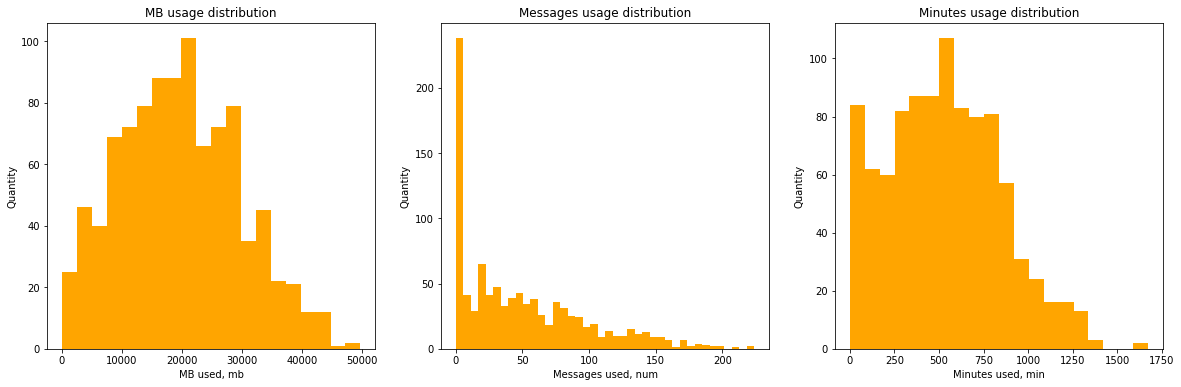

In [81]:
f, axs = plt.subplots(1, 3, figsize=(20,6))
axs[0].hist(ultra_users_spending['mb_used'], bins = 20, color="orange");
axs[0].set_title('MB usage distribution');
axs[0].set_xlabel('MB used, mb');
axs[0].set_ylabel('Quantity');

axs[1].hist(ultra_users_spending['count_messages'], bins = 40, color="orange");
axs[1].set_title('Messages usage distribution');
axs[1].set_xlabel('Messages used, num');
axs[1].set_ylabel('Quantity');

axs[2].hist(ultra_users_spending['duration'], bins = 20, color="orange");
axs[2].set_title('Minutes usage distribution');
axs[2].set_xlabel('Minutes used, min');
axs[2].set_ylabel('Quantity');

Теперь посмотрим на пользователей тарифа "smart".

Использованные мегабайты распределяются нормально. Отправленные сообщения распределяются в соответствии с распределением Пуассона, с пиком в нулевом значении, который показывает, что некоторые пользователи уже совсем перестали пользоваться смс. Распределение потраченных минут также выглядит нормально.

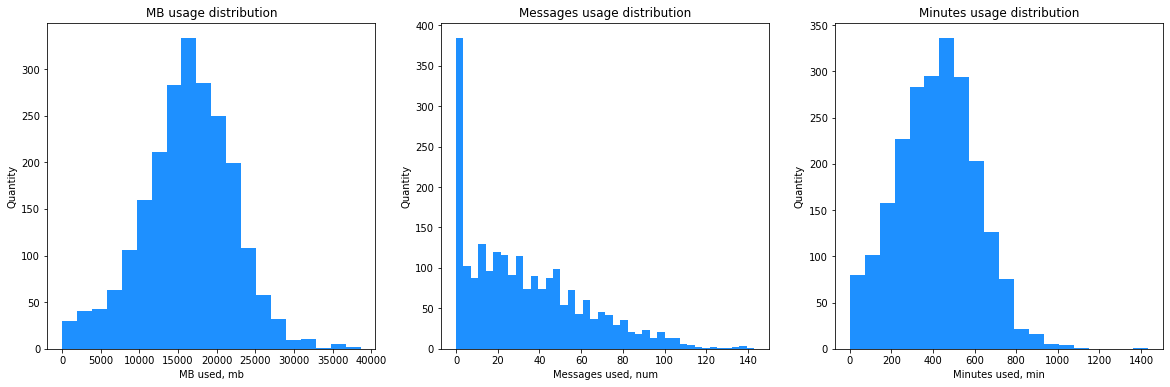

In [82]:
f, axs = plt.subplots(1, 3, figsize=(20,6))
axs[0].hist(smart_users_spending['mb_used'], bins = 20, color="dodgerblue");
axs[0].set_title('MB usage distribution');
axs[0].set_xlabel('MB used, mb');
axs[0].set_ylabel('Quantity');

axs[1].hist(smart_users_spending['count_messages'], bins = 40, color="dodgerblue");
axs[1].set_title('Messages usage distribution');
axs[1].set_xlabel('Messages used, num');
axs[1].set_ylabel('Quantity');

axs[2].hist(smart_users_spending['duration'], bins = 20, color="dodgerblue");
axs[2].set_title('Minutes usage distribution');
axs[2].set_xlabel('Minutes used, min');
axs[2].set_ylabel('Quantity');

<a id='Объединенные гистограммы'>

Построим объединенные гистограммы в целях сравнительного анализа.

Поэтому графику можно сделать вывод, что пользователи тарифа "smart" в целом пользуются меньшим количеством интернет трафика, но в среднем тратят больше трафика, отведенного до дефолту.

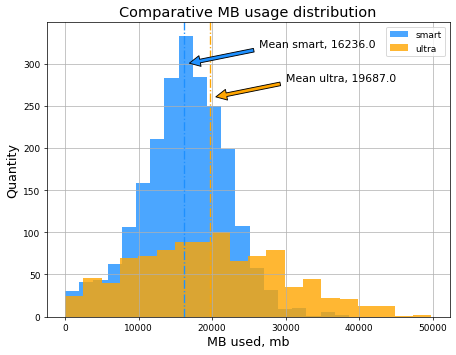

In [83]:
plt.figure(figsize=(8,6), dpi = 65);

plt.hist(users_spending.loc[users_spending['tariff'] == 'smart', "mb_used"], color="dodgerblue", label="smart",\
         alpha=0.8, bins = 20);
plt.hist(users_spending.loc[users_spending['tariff'] == 'ultra', "mb_used"], color="orange", label="ultra",\
         alpha=0.8, bins = 20);

mean_smart = users_spending.loc[users_spending['tariff'] == 'smart', "mb_used"].mean()
mean_ultra = users_spending.loc[users_spending['tariff'] == 'ultra', "mb_used"].mean()

plt.axvline(mean_smart, color='dodgerblue', linestyle='dashdot')
plt.axvline(mean_ultra, color='orange', linestyle='dashdot')

plt.annotate(f'Mean smart, {mean_smart.round(0)}', xy=(16400, 300), xytext=(26400, 320), fontsize=12, \
             arrowprops=dict(facecolor='dodgerblue', shrink=0.05))
plt.annotate(f'Mean ultra, {mean_ultra.round(0)}', xy=(20000, 260), xytext=(30000, 280), fontsize=12, \
             arrowprops=dict(facecolor='orange', shrink=0.05))

plt.title('Сomparative MB usage distribution', fontsize=16)
plt.ylabel('Quantity', fontsize=14)
plt.xlabel('MB used, mb', fontsize=14)

plt.grid()
plt.legend()
plt.show()

На этом графике видно, что часть пользователей обоих тарифов совсем перестала пользоваться сообщениями, пользователи тарифа "ultra" отправляют их чаще, но в целом можно сказать, что количество сообшений в обоих тарифах завышено.

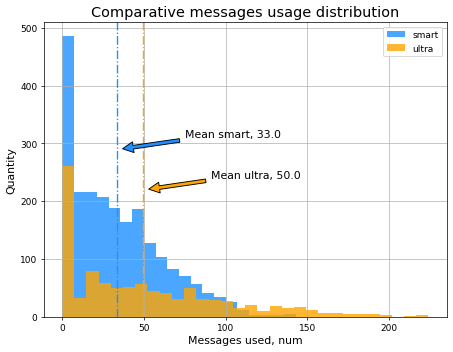

In [84]:
plt.figure(figsize=(8,6), dpi = 65);

plt.hist(users_spending.loc[users_spending['tariff'] == 'smart', "count_messages"], color="dodgerblue", label="smart",\
         alpha=0.8, bins = 20);
plt.hist(users_spending.loc[users_spending['tariff'] == 'ultra', "count_messages"], color="orange", label="ultra",\
         alpha=0.8, bins = 30);

mean_smart = users_spending.loc[users_spending['tariff'] == 'smart', "count_messages"].mean()
mean_ultra = users_spending.loc[users_spending['tariff'] == 'ultra', "count_messages"].mean()

plt.axvline(mean_smart, color='dodgerblue', linestyle='dashdot')
plt.axvline(mean_ultra, color='orange', linestyle='dashdot')

plt.annotate(f'Mean smart, {mean_smart.round(0)}', xy=(35, 290), xytext=(75, 310), fontsize=12, \
             arrowprops=dict(facecolor='dodgerblue', shrink=0.05))
plt.annotate(f'Mean ultra, {mean_ultra.round(0)}', xy=(51, 220), xytext=(91, 240), fontsize=12, \
             arrowprops=dict(facecolor='orange', shrink=0.05))

plt.title('Сomparative messages usage distribution', fontsize=16)
plt.ylabel('Quantity', fontsize=12)
plt.xlabel('Messages used, num', fontsize=12)
plt.grid()
plt.legend()
plt.show()

По этому графику можно сказать, что пользователи тарифа "smart" эффективнее используют возможности своего тарифа.

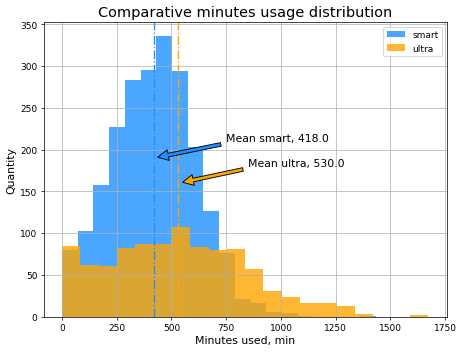

In [85]:
plt.figure(figsize=(8,6), dpi = 65);

plt.hist(users_spending.loc[users_spending['tariff'] == 'smart', "duration"], color="dodgerblue", label="smart",\
         alpha=0.8, bins = 20);
plt.hist(users_spending.loc[users_spending['tariff'] == 'ultra', "duration"], color="orange", label="ultra",\
         alpha=0.8, bins = 20);

mean_smart = users_spending.loc[users_spending['tariff'] == 'smart', "duration"].mean()
mean_ultra = users_spending.loc[users_spending['tariff'] == 'ultra', "duration"].mean()

plt.axvline(mean_smart, color='dodgerblue', linestyle='dashdot')
plt.axvline(mean_ultra, color='orange', linestyle='dashdot')

plt.annotate(f'Mean smart, {mean_smart.round(0)}', xy=(420, 190), xytext=(750, 210), fontsize=12, \
             arrowprops=dict(facecolor='dodgerblue', shrink=0.05))
plt.annotate(f'Mean ultra, {mean_ultra.round(0)}', xy=(535, 160), xytext=(850, 180), fontsize=12, \
             arrowprops=dict(facecolor='orange', shrink=0.05))

plt.title('Сomparative minutes usage distribution', fontsize=16)
plt.ylabel('Quantity', fontsize=12)
plt.xlabel('Minutes used, min', fontsize=12)
plt.grid()
plt.legend()
plt.show()

На этом графике видно, что количество пользователей, доплачивающих за дополнительные услуги, в разы больше среди пользователей тарифа "smart". Но даже доплачивая, эти пользователи в среднем платят меньше пользователей тарифа "ultra".

<a id='Важный график'>

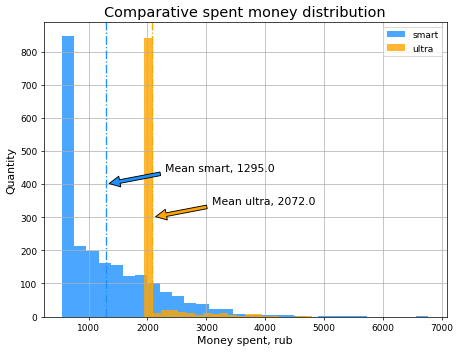

In [86]:
plt.figure(figsize=(8,6), dpi = 65);

plt.hist(users_spending.loc[users_spending['tariff'] == 'smart', "spent_money"], color="dodgerblue", label="smart",\
         alpha=0.8, bins = 30);
plt.hist(users_spending.loc[users_spending['tariff'] == 'ultra', "spent_money"], color="orange", label="ultra",\
         alpha=0.8, bins = 20);

mean_smart = users_spending.loc[users_spending['tariff'] == 'smart', "spent_money"].mean()
mean_ultra = users_spending.loc[users_spending['tariff'] == 'ultra', "spent_money"].mean()

plt.axvline(mean_smart, color='dodgerblue', linestyle='dashdot')
plt.axvline(mean_ultra, color='orange', linestyle='dashdot')

plt.annotate(f'Mean smart, {mean_smart.round(0)}', xy=(1300, 400), xytext=(2300, 440), fontsize=12, \
             arrowprops=dict(facecolor='dodgerblue', shrink=0.05))
plt.annotate(f'Mean ultra, {mean_ultra.round(0)}', xy=(2090, 300), xytext=(3090, 340), fontsize=12, \
             arrowprops=dict(facecolor='orange', shrink=0.05))

plt.title('Сomparative spent money distribution', fontsize=16)
plt.ylabel('Quantity', fontsize=12)
plt.xlabel('Money spent, rub', fontsize=12)
plt.grid()
plt.legend()
plt.show()

Добавим в наш рабочий датафрейм столбец с местоположением пользователя.

In [87]:
data_users_location = data_users[['user_id', 'city']].set_index('user_id')

In [88]:
users_spending = users_spending.join(data_users_location)

Этот график убедительно доказывает что пользователи в Москве платят за услуги оператора столько же, сколько и пользователи остальных регионов.

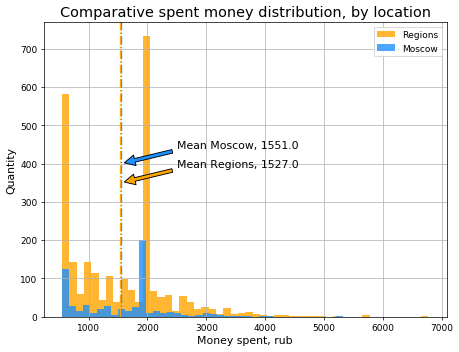

In [89]:
plt.figure(figsize=(8,6), dpi = 65);

plt.hist(users_spending.loc[users_spending['city'] != 'Москва', "spent_money"], color="orange", label="Regions",\
         alpha=0.8, bins = 50);
plt.hist(users_spending.loc[users_spending['city'] == 'Москва', "spent_money"], color="dodgerblue", label="Moscow",\
         alpha=0.8, bins = 40);

mean_moscow = users_spending.loc[users_spending['city'] == 'Москва', "spent_money"].mean()
mean_regions = users_spending.loc[users_spending['city'] != 'Москва', "spent_money"].mean()

plt.axvline(mean_moscow, color='dodgerblue', linestyle='dashdot')
plt.axvline(mean_regions, color='orange', linestyle='dashdot')

plt.annotate(f'Mean Moscow, {mean_moscow.round(0)}', xy=(1560, 400), xytext=(2500, 440), fontsize=12, \
             arrowprops=dict(facecolor='dodgerblue', shrink=0.05))
plt.annotate(f'Mean Regions, {mean_regions.round(0)}', xy=(1560, 350), xytext=(2500, 390), fontsize=12, \
             arrowprops=dict(facecolor='orange', shrink=0.05))

plt.title('Сomparative spent money distribution, by location', fontsize=16)
plt.ylabel('Quantity', fontsize=12)
plt.xlabel('Money spent, rub', fontsize=12)
plt.grid()
plt.legend()
plt.show()

<a id='Вывод_4'>

### <p style="text-align:center">Вывод</p>

##### Таким образом в данной части нашего исследовании мы:

___


1. Вычислили среднее, дисперсию, стандартное отклонение для пользователей различных тарифов для каждого месяца. Для наглядности выделили градиентным цветом значения и сразу же увидели интересные закономерности.


2. Построили гистограммы распределения интересующих нас величин, описали увиденное.


3. Выполнили построение объединенных гистограмм в целях сравнительного анализа интересующей нас информации; на основе полученной информации сделали объективные выводы.


___


Таким образом была выполнена аналитическая часть нашего исследования, удалось обнаружить интересные особенности предоставленной информации о клиентах разных тарифов. Можно переходить к заключительной части.

## Часть 5. Проверка гипотез
    

<a id='Гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"'>

### <p style="text-align:center">Гипотеза "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"</p>

Исходя из задания, нам необходимо сопоставить две генеральные совокупности чтобы понять, различаются ли средние выручки пользователей разных тарифов. Выше мы уже построили объединенную гистограмму и поняли, что средняя выручка пользователей различается, однако без проведения корректного теста нельзя считать отличия случайными или разницу достаточной, чтобы полагать суммы разными. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, воспользуемся статистическими методами.

Сформулируем нулевую гипотезу H0. H0 всегда формулируется так, чтобы использовать знак равенства. Таким образом наша гипотеза будет звучать как "Средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается", от есть они равны. Тогда альтернативная гипотеза H1 будет "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается". 

Задаем критический уровень значимости. Будем считать, что значимость у нас очень высока, поэтому значение alpha будет очень низким.

In [90]:
alpha = 0.001

Далее пишем код, который на выходе даст условную вероятность того, что наша нулевая гипотеза H0 верна, а также автоматически сравнит полученную условную вероятность с пороговым значением. Если пороговое значение выше, мы отвергнем нулевую гипотезу.

In [91]:
results = st.ttest_ind(users_spending.query('tariff == "smart"')['spent_money'], \
                       users_spending.query('tariff == "ultra"')['spent_money'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2662456990387195e-157
Отвергаем нулевую гипотезу


Таким образом, с условной вероятнотностью в 99,99% можно сделать вывод о том, что выручка пользователей тарифов «Ультра» и «Смарт» различается.

<a id='Гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"'>

### <p style="text-align:center">Гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"</p>

Сформулируем нулевую гипотезу H0. В данном случае наша гипотеза будет звучать как "Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов", от есть они равны. Тогда альтернативная гипотеза H1 будет "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов".

Задаем критический уровень значимости. Опять будем считать, что значимость у нас очень высока, поэтому значение alpha будет очень низким.

In [92]:
alpha = 0.001

Далее пишем код, который на выходе даст условную вероятность того, что наша нулевая гипотеза H0 верна, а также автоматически сравнит полученную условную вероятность с пороговым значением. Если пороговое значение выше, мы отвергнем нулевую гипотезу.

In [93]:
results = st.ttest_ind(users_spending.query('city == "Москва"')['spent_money'], \
                       users_spending.query('city != "Москва"')['spent_money'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.509732497839103
Не получилось отвергнуть нулевую гипотезу


Такам образом, с условной вероятностью чуть более 50%, такое или большее различие нельзя получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками.

<a id='Вывод_5'>

### <p style="text-align:center">Вывод</p>

##### Таким образом в заключительной части нашего исследовании мы:

___


1. Проверили гипотезу "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается". И она подтвердилась.


2. Проверили гипотезу "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов". И она была отвергнута.


___


Резюмируя, была выполнена заключительная часть нашего исследования, в которой мы сформировали и проверили несколько гипотез.

## Часть 6. Общий вывод
    

<a id='Вывод_6'>

### <p style="text-align:center">Общий вывод о проделанной работе</p>

Таким образом, на основе предоставленных датасетов была выполнена работа по поиску необходимой информации, ее анализу и проверке гипотез.

___

- В первую очередь было произведено импортирование необходимых библиотек, загрузка датасетов и получение о них общей информации. Уже на этом этапе в данных обнаружились проблемы, подробнее о которых можно почитать <a href='#Вывод_1'>здесь</a>.


- Для устранения этих дефектов данных была выполнена предобработка данных. В процессе работы были применены необходимые методы и атрибуты. Подробнее о каждой операции по предобработке данных написано в соответствующем пункте работы. Выводы по проделанной в этом пункте работе можно посмотреть <a href='#Вывод_2'>здесь</a>.


- Далее мы занялись добавлением необходимой информации, <a href='#Вывод_3'>здесь</a> все описано подробнее.


- После добавления нужной нам информации приступили к ее анализу, где мы выводили много гистограмм, считали дисперсии, стандартные отклонения, средние значения, и делали на основании всего этого выводы. Самая объемная часть нашей работы, с выводами которой можно ознакомиться <a href='#Вывод_4'>здесь</a>.


- Ну и в заключительной части нашего исследования мы проверили несколько гипотез и сделали выводы на основе условных вероятностей. Подробности можно найти <a href='#Вывод_5'>здесь</a>.


Ответ на главный вопрос нашего исследования - "какой же тариф лучше?" - неоднозначен. С одной стороны, как видно на <a href='#Важный график'>графике</a> сравнения распределений потраченных денег, пользователи тарифа "ultra" платят за услуги больше, что выгодно оператору сотовой связи. С другой стороны, как опять же видно на <a href='#Объединенные гистограммы'>графиках</a> сравнительных распределений, во-первых, пользователи тарифа "smart" чаще перерасходуют выделенные им по тарифу мегабайты; во-вторых есть явный переизбыток базовых минут и сообщений в тарифе "ultra".

Так что, если у нас просто стоит вопрос о выборе одного тарифа из двух, мы выберем "ultra", как тариф просто приносящий больше денег компании, а если стоит вопрос о каком-то качественном изменении тарифов, то можно порекомендовать уменьшить количество базовых минут и сообщений в тарифе "ultra", а пользавателям тарифа "smart" поднять плату за переиспользование интернет-трафика.


___
